In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns


In [2]:
df_charts = pd.DataFrame()
years = [2017, 2016, 2015, 2014, 2013]
x = 0
urls = ['https://www.billboard.com/charts/year-end/2017/hot-100-artists','https://www.billboard.com/charts/year-end/2016/hot-100-artists','https://www.billboard.com/charts/year-end/2015/hot-100-artists', 'https://www.billboard.com/charts/year-end/2014/hot-100-artists','https://www.billboard.com/charts/year-end/2013/hot-100-artists'] 
for url in urls:
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    names = soup.find_all('div', class_="ye-chart-item__title") 

    ls = []
    for item in names:
        temp = item.contents[0]
        temp = temp.strip()
        ls.append(temp)

    ranks = list(range(1,101))
    dx = pd.DataFrame()
    dx['artist'] = ls
    if years[x] == 2016:
        line = pd.DataFrame({"artist": 'unknown'}, index=[88])
        dx = pd.concat([dx.ix[:87], line, dx.ix[88:]]).reset_index(drop=True)
    if years[x] == 2015:
        line = pd.DataFrame({"artist": 'unknown'}, index=[83])
        dx = pd.concat([dx.ix[:82], line, dx.ix[83:]]).reset_index(drop=True)
    dx['year'] = years[x]
    dx['rank'] = ranks
    print(years[x])
    print(dx.shape)
    x += 1
    df_charts = pd.concat([df_charts, dx]).reset_index(drop=True)
df_charts

2017
(100, 3)


/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2016
(100, 3)


/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2015
(100, 3)
2014
(100, 3)
2013
(100, 3)


,artist,year,rank
0,Ed Sheeran,2017,1
1,Bruno Mars,2017,2
2,Kendrick Lamar,2017,3
3,The Chainsmokers,2017,4
4,Drake,2017,5
5,Lil Uzi Vert,2017,6
6,Migos,2017,7
7,The Weeknd,2017,8
8,Imagine Dragons,2017,9
9,Future,2017,10


In [3]:
df_2017 = pd.read_csv('2017_tours.csv', encoding = "ISO-8859-1")
df_2016 = pd.read_csv('2016_tours.csv', encoding = "ISO-8859-1")
df_2015 = pd.read_csv('2015_tours.csv', encoding = "ISO-8859-1")
df_2014 = pd.read_csv('2014_tours.csv', encoding = "ISO-8859-1")
df_2013 = pd.read_csv('2013_tours.csv', encoding = "ISO-8859-1")
df_2017 = df_2017.iloc[:,:-2]
df_2016 = df_2016.iloc[:,:-4]
df_2015 = df_2015.iloc[:,:-3]
df_2014 = df_2014.iloc[:,:-3]
df_2013 = df_2013.iloc[:,:-3]
df_2017

,Rank,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross
0,1,176.1,U2,116.59,"58,108","1,510,804","6,774,900"
1,2,112.4,Bruno Mars,116.82,"19,243","962,164","2,248,000"
2,3,110.3,Metallica,96.86,"47,448","1,138,756","4,595,833"
3,4,101.4,Garth Brooks,70.81,"53,034","1,431,921","3,755,556"
4,5,98.0,Guns N Roses,117.14,"22,015","836,555","2,578,724"
5,6,92.1,Roger Waters,121.79,"16,439","756,189","2,002,093"
6,7,85.7,Lady Gaga,116.24,"21,062","737,155","2,448,104"
7,8,83.7,Coldplay,110.96,"41,889","754,004","4,648,195"
8,9,82.3,Billy Joel,114.88,"39,800","716,399","4,572,222"
9,10,79.3,Tim McGraw / Faith Hill,85.11,"13,314","931,959","1,133,135"


In [4]:
chart_17 = df_charts[df_charts['year'] == 2017]
chart_16 = df_charts[df_charts['year'] == 2016]
chart_15 = df_charts[df_charts['year'] == 2015]
chart_14 = df_charts[df_charts['year'] == 2014]
chart_13 = df_charts[df_charts['year'] == 2013]
chart_17

,artist,year,rank
0,Ed Sheeran,2017,1
1,Bruno Mars,2017,2
2,Kendrick Lamar,2017,3
3,The Chainsmokers,2017,4
4,Drake,2017,5
5,Lil Uzi Vert,2017,6
6,Migos,2017,7
7,The Weeknd,2017,8
8,Imagine Dragons,2017,9
9,Future,2017,10


Question: What percentage of top billboard artists were also represented on the top tours charts? What was their average billboard ranking versus their average charts ranking? Were Artists generally higher on the billboard charts or the tour charts?

### 2017

In [5]:
# Percent of Artists that appear on both the billboard and tour charts
tour17 = list(df_2017.Artist)
both17 = chart_17[chart_17['artist'].isin(tour17)]
perc17 = (len(both17.artist)/200) * 100
'2017 : ' + str(perc17) + '%' + ' (' + str(len(both17)) + '/100)'

'2017 : 9.5% (19/100)'

In [6]:
#Average billboard rank of artists apppearing on both
bill_sum17 = both17['rank'].sum()
av_b_rk17 = bill_sum17/len(both17.artist)
av_b_rk17

36.10526315789474

In [7]:
# Average tour rank of artists appearing on both
b17 = list(both17.artist)
chb17 = df_2017[df_2017['Artist'].isin(b17)]
tour_sum17 = chb17['Rank'].sum()
av_t_rk17 = tour_sum17/len(chb17.Artist)
av_t_rk17

40.8421052631579

In [8]:
#Calculate difference in ranks from billboard to tours
#Calculate percentage change in rank from billboard to tours
both17.columns = ['artist', 'year', 'billboard_rank']
combo17 = pd.merge(chb17, both17, left_on='Artist', right_on='artist', how='outer').drop(labels=['artist'], axis=1)
combo17['rk_diff'] = combo17.apply(lambda x: x.billboard_rank - x.Rank, axis=1)
combo17['perc_rk_change'] = combo17.apply(lambda x: (x.rk_diff/x.billboard_rank)*100, axis=1)
pos_rk_diff17 = combo17[combo17['rk_diff'] > 0]
neg_rk_diff17 = combo17[combo17['rk_diff'] < 0]
eq_rk_diff17 = combo17[combo17['rk_diff'] == 0]
print('positive rank differences: ', len(pos_rk_diff17))
print('negative rank differences: ', len(neg_rk_diff17))
print('no rank differences: ', len(eq_rk_diff17))

positive rank differences:  7
negative rank differences:  11
no rank differences:  1


### 2016

In [9]:
# Percent of Artists that appear on both the billboard and tour charts
tour16 = list(df_2016.Artist)
both16 = chart_16[chart_16['artist'].isin(tour16)]
perc16 = (len(both16.artist)/200) * 100
'2016 : ' + str(perc16) + '%' + ' (' + str(len(both16)) + '/100)'

'2016 : 8.5% (17/100)'

In [10]:
#Average billboard rank of artists apppearing on both
bill_sum16 = both16['rank'].sum()
av_b_rk16 = bill_sum16/len(both16.artist)
av_b_rk16

34.705882352941174

In [11]:
# Average tour rank of artists appearing on both
b16 = list(both16.artist)
chb16 = df_2016[df_2016['Artist'].isin(b16)]
tour_sum16 = chb16['Rank'].sum()
av_t_rk16 = tour_sum16/len(chb16.Artist)
av_t_rk16

25.352941176470587

In [12]:
#Calculate difference in ranks from billboard to tours
#Calculate percentage change in rank from billboard to tours
both16.columns = ['artist', 'year', 'billboard_rank']
combo16 = pd.merge(chb16, both16, left_on='Artist', right_on='artist', how='outer').drop(labels=['artist'], axis=1)
combo16['rk_diff'] = combo16.apply(lambda x: x.billboard_rank - x.Rank, axis=1)
combo16['perc_rk_change'] = combo16.apply(lambda x: (x.rk_diff/x.billboard_rank)*100, axis=1)
pos_rk_diff16 = combo16[combo16['rk_diff'] > 0]
neg_rk_diff16 = combo16[combo16['rk_diff'] < 0]
eq_rk_diff16 = combo16[combo16['rk_diff'] == 0]
print('positive rank differences: ', len(pos_rk_diff16))
print('negative rank differences: ', len(neg_rk_diff16))
print('no rank differences: ', len(eq_rk_diff16))

positive rank differences:  9
negative rank differences:  7
no rank differences:  1


## 2015

In [13]:
# Percent of Artists that appear on both the billboard and tour charts
tour15 = list(df_2015.Artist)
both15 = chart_15[chart_15['artist'].isin(tour15)]
perc15 = (len(both15.artist)/200) * 100
'2015 : ' + str(perc15) + '%' + ' (' + str(len(both15)) + '/100)'

'2015 : 9.0% (18/100)'

In [14]:
#Average billboard rank of artists apppearing on both
bill_sum15 = both15['rank'].sum()
av_b_rk15 = bill_sum15/len(both15.artist)
av_b_rk15

39.5

In [15]:
# Average tour rank of artists appearing on both
b15 = list(both15.artist)
chb15 = df_2015[df_2015['Artist'].isin(b15)]
tour_sum15 = chb15['Rank'].sum()
av_t_rk15 = tour_sum15/len(chb15.Artist)
av_t_rk15

32.611111111111114

In [16]:
#Calculate difference in ranks from billboard to tours
#Calculate percentage change in rank from billboard to tours
both15.columns = ['artist', 'year', 'billboard_rank']
combo15 = pd.merge(chb15, both15, left_on='Artist', right_on='artist', how='outer').drop(labels=['artist'], axis=1)
combo15['rk_diff'] = combo15.apply(lambda x: x.billboard_rank - x.Rank, axis=1)
combo15['perc_rk_change'] = combo15.apply(lambda x: (x.rk_diff/x.billboard_rank)*100, axis=1)
pos_rk_diff15 = combo15[combo15['rk_diff'] > 0]
neg_rk_diff15 = combo15[combo15['rk_diff'] < 0]
eq_rk_diff15 = combo15[combo15['rk_diff'] == 0]
print('positive rank differences: ', len(pos_rk_diff15))
print('negative rank differences: ', len(neg_rk_diff15))
print('no rank differences: ', len(eq_rk_diff15))

positive rank differences:  11
negative rank differences:  7
no rank differences:  0


## 2014

In [17]:
# Percent of Artists that appear on both the billboard and tour charts
tour14 = list(df_2014.Artist)
both14 = chart_14[chart_14['artist'].isin(tour14)]
perc14 = (len(both14.artist)/200) * 100
'2014 : ' + str(perc14) + '%' + ' (' + str(len(both14)) + '/100)'

'2014 : 10.0% (20/100)'

In [18]:
#Average billboard rank of artists apppearing on both
bill_sum14 = both14['rank'].sum()
av_b_rk14 = bill_sum14/len(both14.artist)
av_b_rk14

41.45

In [19]:
# Average tour rank of artists appearing on both
b14 = list(both14.artist)
chb14 = df_2014[df_2014['Artist'].isin(b14)]
tour_sum14 = chb14['Rank'].sum()
av_t_rk14 = tour_sum14/len(chb14.Artist)
av_t_rk14

44.15

In [20]:
#Calculate difference in ranks from billboard to tours
#Calculate percentage change in rank from billboard to tours
both14.columns = ['artist', 'year', 'billboard_rank']
combo14 = pd.merge(chb14, both14, left_on='Artist', right_on='artist', how='outer').drop(labels=['artist'], axis=1)
combo14['rk_diff'] = combo14.apply(lambda x: x.billboard_rank - x.Rank, axis=1)
combo14['perc_rk_change'] = combo14.apply(lambda x: (x.rk_diff/x.billboard_rank)*100, axis=1)
pos_rk_diff14 = combo14[combo14['rk_diff'] > 0]
neg_rk_diff14 = combo14[combo14['rk_diff'] < 0]
eq_rk_diff14 = combo14[combo14['rk_diff'] == 0]
print('positive rank differences: ', len(pos_rk_diff14))
print('negative rank differences: ', len(neg_rk_diff14))
print('no rank differences: ', len(eq_rk_diff14))

positive rank differences:  11
negative rank differences:  9
no rank differences:  0


## 2013

In [21]:
# Percent of Artists that appear on both the billboard and tour charts
tour13 = list(df_2013.Artist)
both13 = chart_13[chart_13['artist'].isin(tour13)]
perc13 = (len(both13.artist)/200) * 100
'2013 : ' + str(perc13) + '%' + ' (' + str(len(both13)) + '/100)'

'2013 : 12.5% (25/100)'

In [22]:
#Average billboard rank of artists apppearing on both
bill_sum13 = both13['rank'].sum()
av_b_rk13 = bill_sum13/len(both13.artist)
av_b_rk13

38.96

In [23]:
# Average tour rank of artists appearing on both
b13 = list(both13.artist)
chb13 = df_2013[df_2013['Artist'].isin(b13)]
tour_sum13 = chb13['Rank'].sum()
av_t_rk13 = tour_sum13/len(chb13.Artist)
av_t_rk13

40.08

In [24]:
#Calculate difference in ranks from billboard to tours
#Calculate percentage change in rank from billboard to tours
both13.columns = ['artist', 'year', 'billboard_rank']
combo13 = pd.merge(chb13, both13, left_on='Artist', right_on='artist', how='outer').drop(labels=['artist'], axis=1)
combo13['rk_diff'] = combo13.apply(lambda x: x.billboard_rank - x.Rank, axis=1)
combo13['perc_rk_change'] = combo13.apply(lambda x: (x.rk_diff/x.billboard_rank)*100, axis=1)
pos_rk_diff13 = combo13[combo13['rk_diff'] > 0]
neg_rk_diff13 = combo13[combo13['rk_diff'] < 0]
eq_rk_diff13 = combo13[combo13['rk_diff'] == 0]
print('positive rank differences: ', len(pos_rk_diff13))
print('negative rank differences: ', len(neg_rk_diff13))
print('no rank differences: ', len(eq_rk_diff13))

positive rank differences:  14
negative rank differences:  11
no rank differences:  0


## Combined Analysis

In [25]:
#create dataframe of all artists who appeared on both billboard and tour charts in a given year over the 5 year window
combo_all = pd.concat([combo17, combo16, combo15, combo14, combo13]).reset_index(drop=True)
combo_all['abs_rk_diff'] = abs(combo_all['rk_diff'])

#Find the artists who appeared on both the most (a.k.a. the most consistently charting and touring artists)
app_count = combo_all.groupby('Artist').count().drop(labels=['Gross Millions', 'Average Ticket Price', 'Average Tickets', 'Total Tickets', 'Average Gross', 'year', 'billboard_rank', 'rk_diff', 'perc_rk_change', 'abs_rk_diff'], axis=1)
app_count.columns = ['app_count']
#app_count.sort_values(by='app_count', ascending=False).head(10)

In [26]:
#create dataframe of artist totals 
summed_combo_all = combo_all.groupby('Artist').sum()
summed_combo_all = pd.merge(summed_combo_all, app_count, left_index=True, right_index=True)

#show artists with most appearances
summed_combo_all.sort_values(by='app_count', ascending=False).head(10)

,Rank,Gross Millions,Average Ticket Price,year,billboard_rank,rk_diff,perc_rk_change,abs_rk_diff,app_count
Artist,,,,,,,,,
Luke Bryan,59,318.8,258.24,10075,218,159,339.422031,159,5
Jason Aldean,128,200.9,243.83,10075,312,184,305.672048,184,5
Florida Georgia Line,154,134.3,181.83,8062,187,33,-83.494388,139,4
Kenny Chesney,15,276.8,238.31,6044,247,232,281.690951,232,3
Lady Gaga,72,147.3,311.40,6044,168,96,150.253575,104,3
Justin Bieber,115,159.9,245.05,6046,59,-56,-459.846547,104,3
Imagine Dragons,169,63.4,150.99,6046,115,-54,-1083.819444,164,3
One Direction,25,242.8,226.86,6042,59,34,170.506536,34,3
Blake Shelton,165,59.7,148.05,6043,129,-36,-127.356242,48,3


In [27]:

#Find artists with smallest difference between billboard and tour ranks (a.k.a. most consistently placing artists)
summed_combo_all.sort_values(by='abs_rk_diff', ascending=True).head(10)

,Rank,Gross Millions,Average Ticket Price,year,billboard_rank,rk_diff,perc_rk_change,abs_rk_diff,app_count
Artist,,,,,,,,,
Adele,5,95.1,111.58,2016,5,0,0.000000,0,1
Taylor Swift,2,312.1,195.94,4028,8,6,133.333333,6,2
Swedish House Mafia,55,19.7,68.30,2013,62,7,11.290323,7,1
Demi Lovato,49,19.5,46.39,2014,42,-7,-16.666667,7,1
Miley Cyrus,21,36.1,69.43,2014,30,9,30.000000,9,1
Mumford & Sons,50,21.2,44.21,2013,61,11,18.032787,11,1
Lady Antebellum,42,22.8,54.21,2014,55,13,23.636364,13,1
Alicia Keys,66,14.5,79.85,2013,80,14,17.500000,14,1
J. Cole,114,43.1,111.45,4032,98,-16,-32.525084,16,2


In [28]:
#create dataframe with averaged statistics for all artists
avg_combo_all = summed_combo_all.apply(lambda x: x / summed_combo_all['app_count'])
avg_combo_all = avg_combo_all.drop(labels=['app_count', 'year'], axis=1)
avg_combo_all = pd.merge(avg_combo_all, app_count, left_index=True, right_index=True)
avg_combo_all.columns = ['avg_rank', 'Avg_Gross_Millions', 'Avg_Ticket_Price', 'Avg_billboard_rank', 'Avg_rk_diff', 'Avg_perc_rk_change', 'Avg_abs_rk_diff','app_count']
avg_combo_all.sort_values(by='app_count', ascending=False).head(10)

,avg_rank,Avg_Gross_Millions,Avg_Ticket_Price,Avg_billboard_rank,Avg_rk_diff,Avg_perc_rk_change,Avg_abs_rk_diff,app_count
Artist,,,,,,,,
Luke Bryan,11.800000,63.760000,51.648000,43.600000,31.800000,67.884406,31.800000,5
Jason Aldean,25.600000,40.180000,48.766000,62.400000,36.800000,61.134410,36.800000,5
Florida Georgia Line,38.500000,33.575000,45.457500,46.750000,8.250000,-20.873597,34.750000,4
Kenny Chesney,5.000000,92.266667,79.436667,82.333333,77.333333,93.896984,77.333333,3
Lady Gaga,24.000000,49.100000,103.800000,56.000000,32.000000,50.084525,34.666667,3
Justin Bieber,38.333333,53.300000,81.683333,19.666667,-18.666667,-153.282182,34.666667,3
Imagine Dragons,56.333333,21.133333,50.330000,38.333333,-18.000000,-361.273148,54.666667,3
One Direction,8.333333,80.933333,75.620000,19.666667,11.333333,56.835512,11.333333,3
Blake Shelton,55.000000,19.900000,49.350000,43.000000,-12.000000,-42.452081,16.000000,3


In [29]:
avg_combo_all.index.values[-20:]

array(['Mumford & Sons', 'Nicki Minaj', 'One Direction', 'OneRepublic',
       'Paul McCartney', 'Pitbull', 'Rihanna', 'Sam Hunt', 'Sam Smith',
       'Selena Gomez', 'Shawn Mendes', 'Sia', 'Swedish House Mafia',
       'Taylor Swift', 'The Chainsmokers', 'The Lumineers', 'The Weeknd',
       'Tim McGraw', 'Zac Brown Band', 'fun.'], dtype=object)

In [30]:
## NOTE: I initially did this part of the code at the bottom of the file and it worked,
## at which point I used the to_csv method to send the completed avg_combo_all dataframe
## with correct genre data to an external csv for use in Tableau. Later on, I decided that 
## this code would make more sense in this position in the ipynb file, but when I ran this 
## code it no longer worked. I tried for a while to fix it but it seems that the issue is that I may
## have hit the iTunes api search request limit. Ultimately, this issue doesn't really affect the 
## rest of my project since I already saved the correct genre data in the csv that I used for my 
##visualizations, so I talked to Abhraneel about it, who said that if it wasn't a problem for my 
##project outside of the singular fact of it not working, then I am ok without it.
## **Also covered this in my report**

genres = {}
for artist in avg_combo_all.index.values[-5:]:
    #print(artist)
    response = requests.get('https://itunes.apple.com/search?entity=musicArtist&attribute=artistTerm&limit=1&term='+ artist)
    #print(response)
    try:
        data = json.loads(response.text)
        genres[artist] = data['results'][0]['primaryGenreName']
    except:
        genres[artist] = 'unknown'
    print('------')
avg_combo_all['Genre'] = pd.Series(genres)
summed_combo_all['Genre'] = pd.Series(genres)
#avg_combo_all

------
------
------
------
------


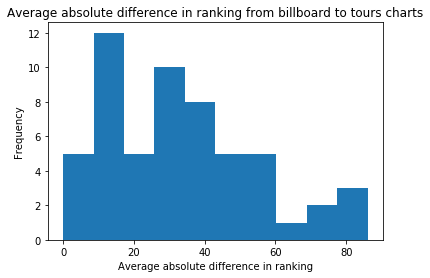

In [31]:
%matplotlib inline
g17 = avg_combo_all['Avg_abs_rk_diff'].plot(kind='hist')
g17.set_title('Average absolute difference in ranking from billboard to tours charts')
g17.set_xlabel('Average absolute difference in ranking')
g17

In [32]:
avg_combo_all

,avg_rank,Avg_Gross_Millions,Avg_Ticket_Price,Avg_billboard_rank,Avg_rk_diff,Avg_perc_rk_change,Avg_abs_rk_diff,app_count,Genre
Artist,,,,,,,,,
Adele,5.000000,95.100000,111.580000,5.000000,0.000000,0.000000,0.000000,1,NaN
Alicia Keys,66.000000,14.500000,79.850000,80.000000,14.000000,17.500000,14.000000,1,NaN
Ariana Grande,34.500000,30.550000,61.775000,44.000000,9.500000,8.622829,15.500000,2,NaN
Beyonce,1.000000,169.400000,123.630000,27.000000,26.000000,96.296296,26.000000,1,NaN
Blake Shelton,55.000000,19.900000,49.350000,43.000000,-12.000000,-42.452081,16.000000,3,NaN
Brad Paisley,39.000000,25.300000,43.250000,85.000000,46.000000,54.117647,46.000000,1,NaN
Brantley Gilbert,95.000000,10.000000,32.450000,51.000000,-44.000000,-86.274510,44.000000,1,NaN
Bruno Mars,10.500000,77.700000,93.370000,1.500000,-9.000000,-900.000000,9.000000,2,NaN
Carrie Underwood,26.500000,42.250000,64.835000,58.500000,32.000000,56.161557,32.000000,2,NaN


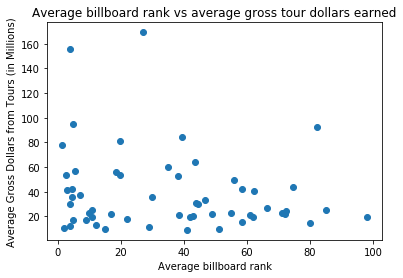

In [33]:
import matplotlib.pyplot as plt
plt.scatter(avg_combo_all.Avg_billboard_rank, avg_combo_all.Avg_Gross_Millions)
plt.title('Average billboard rank vs average gross tour dollars earned')
plt.xlabel('Average billboard rank')
plt.ylabel('Average Gross Dollars from Tours (in Millions)')
plt.show()

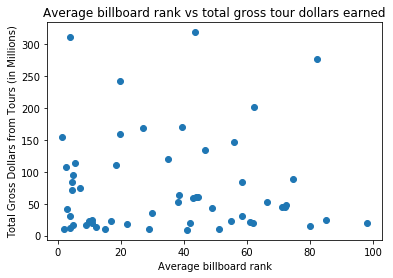

In [34]:
plt.scatter(avg_combo_all.Avg_billboard_rank, summed_combo_all['Gross Millions'])
plt.title('Average billboard rank vs total gross tour dollars earned')
plt.xlabel('Average billboard rank')
plt.ylabel('Total Gross Dollars from Tours (in Millions)')
plt.show()

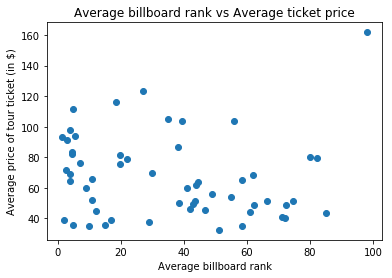

In [35]:
plt.scatter(avg_combo_all.Avg_billboard_rank, avg_combo_all.Avg_Ticket_Price)
plt.title('Average billboard rank vs Average ticket price')
plt.xlabel('Average billboard rank')
plt.ylabel('Average price of tour ticket (in $)')
plt.show()

In [36]:
app_avg = avg_combo_all.copy()
app_avg = app_avg.groupby('app_count', as_index=False).mean()
app_avg

,app_count,avg_rank,Avg_Gross_Millions,Avg_Ticket_Price,Avg_billboard_rank,Avg_rk_diff,Avg_perc_rk_change,Avg_abs_rk_diff
0,1,56.481481,29.081481,64.008889,30.703704,-25.777778,-466.094572,39.703704
1,2,31.300000,46.995000,71.864250,36.675000,5.375000,-252.165818,22.475000
2,3,31.166667,52.772222,73.370000,43.166667,12.000000,-59.365065,38.111111
3,4,38.500000,33.575000,45.457500,46.750000,8.250000,-20.873597,34.750000
4,5,18.700000,51.970000,50.207000,53.000000,34.300000,64.509408,34.300000


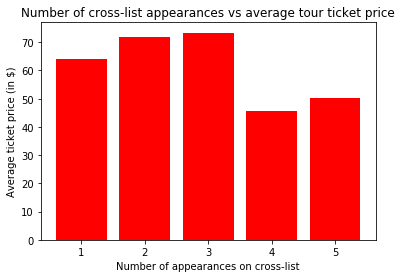

In [37]:
fig, ax = plt.subplots()
appear = ax.bar(app_avg['app_count'], app_avg['Avg_Ticket_Price'], color='r')
ax.set_title('Number of cross-list appearances vs average tour ticket price')
ax.set_xlabel('Number of appearances on cross-list')
ax.set_ylabel('Average ticket price (in $)')

plt.show()

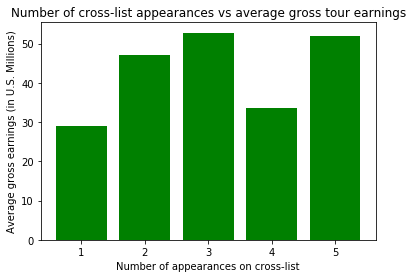

In [38]:
fig1, ax1 = plt.subplots()
appear1 = ax1.bar(app_avg['app_count'], app_avg['Avg_Gross_Millions'], color='g')
ax1.set_title('Number of cross-list appearances vs average gross tour earnings')
ax1.set_xlabel('Number of appearances on cross-list')
ax1.set_ylabel('Average gross earnings (in U.S. Millions)')

plt.show()

In [39]:
percs = [perc17, perc16, perc15, perc14, perc13]
all_d = {2017: [perc17,av_b_rk17,av_t_rk17], 2016: [perc16,av_b_rk16,av_t_rk16], 2015: [perc15,av_b_rk15, av_t_rk15], 2014: [perc14,av_b_rk14,av_t_rk14], 2013: [perc13,av_b_rk13, av_t_rk13]}
all_cross = pd.DataFrame(all_d)
all_cross.index = ['Percent_artists_both', 'Avg_billboard_rk', 'Avg_tour_rk']
all_cross

,2013,2014,2015,2016,2017
Percent_artists_both,12.50,10.00,9.000000,8.500000,9.500000
Avg_billboard_rk,38.96,41.45,39.500000,34.705882,36.105263
Avg_tour_rk,40.08,44.15,32.611111,25.352941,40.842105


In [40]:
#get artists of each year not in both charts
neither17 = chart_17[~chart_17['artist'].isin(tour17)]
neither16 = chart_16[~chart_16['artist'].isin(tour16)]
neither15 = chart_15[~chart_15['artist'].isin(tour15)]
neither14 = chart_14[~chart_14['artist'].isin(tour14)]
neither13 = chart_13[~chart_13['artist'].isin(tour13)]
no_tour_all = pd.concat([neither17,neither16,neither15,neither14,neither13]).reset_index(drop=True)
no_tour_all.sort_values(by='rank', ascending=True).head(10)

,artist,year,rank
246,Pharrell Williams,2014,2
326,Imagine Dragons,2013,3
81,twenty one pilots,2016,3
164,Fetty Wap,2015,3
247,Iggy Azalea,2014,3
0,Drake,2017,5
165,Drake,2015,5
1,Lil Uzi Vert,2017,6
248,Jason Derulo,2014,6
82,The Chainsmokers,2016,6


In [41]:
#calculate average rank of no_tour artists (artists on billboard who did not show up in tour charts)
no_tour_rk_avg = no_tour_all['rank'].sum()
no_tour_rk_avg/len(no_tour_all)

53.51620947630923

In [42]:
len(avg_combo_all)

56